#Chapter 3: Calculus and Optimization#


---



In [20]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import math
from scipy import signal
from scipy import optimize

##3.2: Continuity and Differentiation

### 3.2.1: Limits and Continuity

A limit is the value that a function approaches as the input approaches some value. Notation used is usually of the form $$\lim_{x\to\infty} f(x)=l$$

We will take a look at using Python to find the limit. For this example we are looking at $$\lim_{x\to 100} \frac{1}{x} = \frac{1}{100}$$

In [ ]:
x = sp.Symbol('x')
y = 1/x

sp.limit(y,x,100)

1/100

Continuity of a function essentially means an unbroken chain of values.

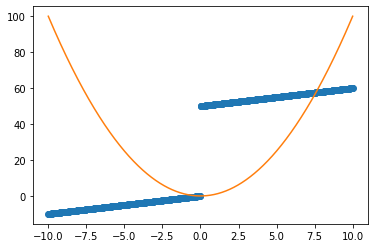

In [ ]:
x=np.linspace(-10,10,1000)    
y=np.linspace(-10,10,1000)
y[y >= 0] = 50 + y[y >= 0]

pos = np.where(np.abs(np.diff(y)) >= 0.5)[0]

x[pos] = np.nan
y[pos] = np.nan

plt.plot(x, y, '-o')

x2 = np.linspace(-10,10,1000)
y2 = x2**2
plt.plot(x2,y2)

plt.show()

The orange line is continuous, while the blue line is has a discontinuity at $x=0$. 

###3.2.2: Derivatives

The derivative of a function measures the sensitivity to change of the function value. This is a fundamental tool of calculus.

If a deriative exists at a chosen input value, then it is equal to the slope of the tangent line to the graph of the function at that point. We use the notation, $\partial$, to denote the derivative, and also $\frac{\partial y}{\partial x}$ means the derivative of $y$ with respect to $x$. 

An example: \begin{align} y &= x^2 \\ \frac{\partial y}{\partial x} &= 2x \end{align}

This can be achieved in Python using SymPy's diff function.

In [ ]:
x = sp.Symbol('x')
f = x**2

print(f"The function is {f}.")
print(f"The derivative of the function is {f.diff(x)}.")

The function is x**2.
The derivative of the function is 2*x.


Also worth noting that if $f$ is differentiable at point $a$, then it is also continuous at that point. However, the reverse is not always true, see $|x|$.

###3.2.3: Taylor's Theorem

Taylor's theorem gives an appromiation of a $k$-times differentiable function around a given point by a polynomial of degree $k$, called the $k$th-order Taylor polynomial. 

This polynomial is referred to as the Taylor Series of the function.

To find the Taylor Series, we know that we want the expansion to be of the form $$f(x) = c_0 + c_1(x-a) + c_2(x-a)^2 + c_3(x-a)^3 + ...$$

We choose a value for $a$ and work out the coefficients $c_n$ using derivatives.
Set $a=x$, then all the $(x-a)$ terms become zero, leaving us with $c_0 = f(a)$.

To find $c_1$, we take the derivative, since $c_0$ is a constant, its derivative is 0.
\begin{align}
f(x) &= c_0 + c_1(x-a) + c_2(x-a)^2 + ... \\
f'(x) &= c_1 + 2c_2(x-a) + ...
\end{align}

If we set $x=a$ again, all the terms after $c_1$ become 0, and we're left with $c_1 = f'(a)$.

Continue this trend and we find $c_2 = \frac{f''(a)}{2}$, and $c_3 = \frac{f'''(a)}{3}$.

For example:
\begin{align}
e^x &= 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + ... \\
&= \sum_{n=0}^\infty \frac{x_n}{n!}
\end{align}

Now $e^2 \approx 7.389056$, and if we do a Taylor Series to $n=6$ we find that
\begin{align}
e^2 &= 1 + 2 + \frac{2^2}{2!} + \frac{2^3}{3!} + \frac{2^4}{4!} + \frac{2^5}{5!} + \frac{2^6}{6!}\\
&= 1 + 2 + 2 + \frac{4}{3} + \frac{2}{3} + \frac{4}{15} + \frac{4}{45} \\
&\approx 7.355556 
\end{align}

The higher $n$, the closer our approximation to the actual value is.


In [8]:
x = 2
e_to_2 = x**0/math.factorial(0) + x**1/math.factorial(1) + x**2/math.factorial(2) + x**3/math.factorial(3) + x**4/math.factorial(4) + x**5/math.factorial(5) + x**6/math.factorial(6)
print(f"{e_to_2} is the value of the Taylor Series approximation after 7 terms.")
print(f"{math.exp(2)} is the value of e.")

7.355555555555555 is the value of the Taylor Series approximation after 7 terms.
7.38905609893065 is the value of e.


## 3.3: Unconstrained Optimization

### 3.3.1 Necessary and Sufficient Condition of Local Minimizers

For $f(x), x\in \mathbb{R}$, a local minimizer is such that the point $x^* \in \mathbb{R}$ has $\delta>0$ such that $f(x)\geq f(x^*),  \forall x\in B_\delta (x^*)$

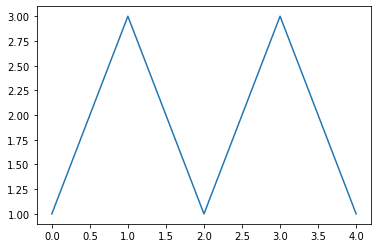

(array([2]),)


In [11]:
data = np.array([1, 3, 1, 3, 1])
minimums = signal.argrelextrema(data, np.less)

plt.plot(data)
plt.show()

print(minimums)

### 3.3.2 Convexity and Global Minimizers

Like local minimizers, we have for $x\in \mathbb{R}$, $f(x)\geq f(x^*)$ but for all $x\in \mathbb{R}$ and not just a neighborhood around the point.

Figure 3.8 demonstrates this difference.

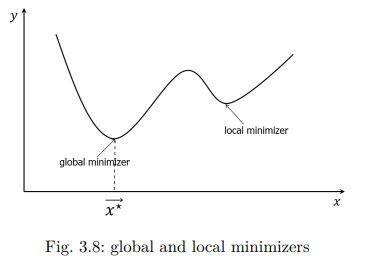




In [21]:
def f(x):
  return x.dot(x) + math.sin(np.linalg.norm(x) * np.pi)

x0 = [10, 10]

xmin = [1, 1]
xmax = [11, 11]

bounds = [(low, high) for low, high in zip(xmin, xmax)]

minimizer_kwargs = dict(method="L-BFGS-B", bounds=bounds)
res = optimize.basinhopping(f, x0, minimizer_kwargs=minimizer_kwargs)

print(res)

                        fun: 1.0360974671501229
 lowest_optimization_result:       fun: 1.0360974671501229
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.40852934, 1.40852934])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 6
      nit: 1
   status: 0
  success: True
        x: array([1., 1.])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 513
                        nit: 100
                          x: array([1., 1.])


### 3.3.3 Gradient Descent

Gradient descent is an iterative optimization algorithm for finding a local minimum of a differentiable function.

One approach is to find all points $x$ of $f$ such that $\nabla f(x)=0$, then we choose the $x$ that produces the smalled value of $f(x)$.

Below we have the code for $f(x) = x^2$.


In [23]:
def gradient_descent(gradient, start, learn_rate, n_iter=50, tolerance=1e-06):
    vector = start
    for _ in range(n_iter):
        diff = -learn_rate * gradient(vector)
        if np.all(np.abs(diff) <= tolerance):
            break
        vector += diff
    return vector

2.210739197207331e-06

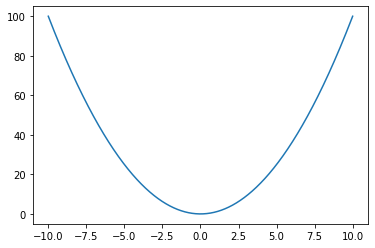

In [29]:
x = np.linspace(-10,10, 1000)
y = x**2

plt.plot(x, y)
gradient_descent(gradient = lambda x: 2 * x, start=10.0, learn_rate=0.2)